In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

# Define the file path on Google Drive
file_path = "/content/drive/MyDrive/Software.csv"

# Load the dataset into a pandas DataFrame
data = pd.read_csv(file_path)


In [3]:
# Drop irrelevant columns like 'About' and 'Link'
data = data.drop(['About', 'Link'], axis=1)

# Convert 'License' column to numerical labels
license_mapping = {'(Free)': 0, '(Trial version)': 1, '(Paid)': 2}
data['License'] = data['License'].map(license_mapping)

# Convert categorical features to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Software', 'Company'])


In [4]:
X = data.drop('License', axis=1)
y = data['License']


In [5]:
missing_values = y.isnull().sum()
print("Missing values in y:", missing_values)


Missing values in y: 78


In [6]:
data.dropna(subset=['License'], inplace=True)

In [7]:
default_license_value = 0  # or any other suitable default value
y.fillna(default_license_value, inplace=True)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [9]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear')

# Train the model on the training data
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predict the target variable on the test data
y_pred = svm_model.predict(X_test)



In [11]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8020393811533052
Precision: 0.78424228488116
Recall: 0.8020393811533052


In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)



Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.96      0.88      2127
         1.0       0.75      0.34      0.47       662
         2.0       0.17      0.04      0.06        55

    accuracy                           0.80      2844
   macro avg       0.58      0.45      0.47      2844
weighted avg       0.78      0.80      0.77      2844



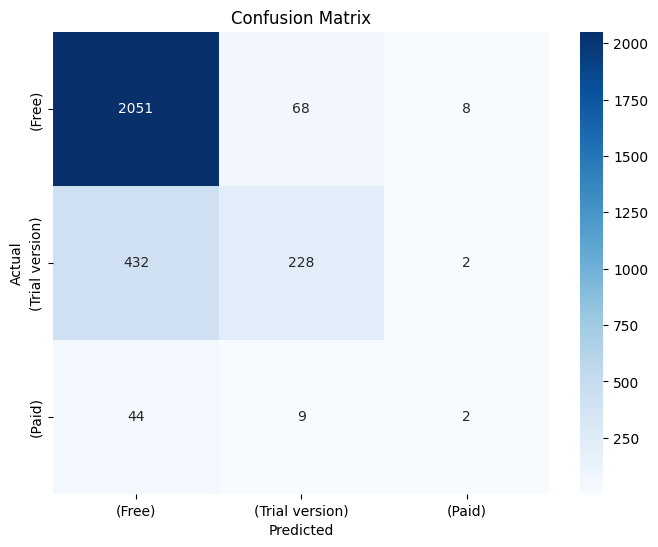

In [13]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=license_mapping.keys(), yticklabels=license_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
import joblib

# Save the trained SVM model to a file
model_filename = "/content/drive/MyDrive/Software_svm_model.pkl"
joblib.dump(svm_model, model_filename)

print("SVM model saved successfully.")

SVM model saved successfully.
